In [141]:
import numpy as np
from qiskit.circuit import QuantumCircuit

In [153]:
def cartanCircuit(VCxGate):
    circ = QuantumCircuit(2)
    phi = np.arctan(1 + np.sqrt(3))
    #qubit 0
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    
    #qubit 1
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.p(15 * np.pi / 16, 1)
    
    circ.barrier(0)
    circ.barrier(1)
    
    circ.append(VCxGate.decompose(), [0, 1])
    
    circ.barrier(0)
    circ.barrier(1)
    
    #qubit 0 after VCx
    
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.z(0)
    
    #qubit 1 after VCx
    
    circ.p(9 * np.pi / 16, 1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    
    return circ

In [154]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [155]:
pi = np.pi
sqrt = np.sqrt
log = np.log 

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)


In [156]:
np.dot(U, np.conjugate(U))

array([[ 1.00000000e+00+2.77555756e-17j, -6.79987439e-17+3.08545131e-17j,
         4.03527930e-17+7.02171389e-17j,  1.11022302e-16-2.22044605e-16j],
       [ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00+1.08793222e-16j,
         5.55111512e-17+1.66533454e-16j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j, -1.66533454e-16-1.66533454e-16j,
         1.00000000e+00-8.32667268e-17j,  0.00000000e+00+0.00000000e+00j],
       [ 5.55111512e-17+1.66533454e-16j, -9.16857144e-18-4.52087041e-17j,
        -9.70970769e-17-1.03169747e-16j,  1.00000000e+00-2.77555756e-17j]])

In [157]:
weylDecomCirc = TwoQubitWeylDecomposition(VCx)

In [158]:
VCxGate = weylDecomCirc.circuit()

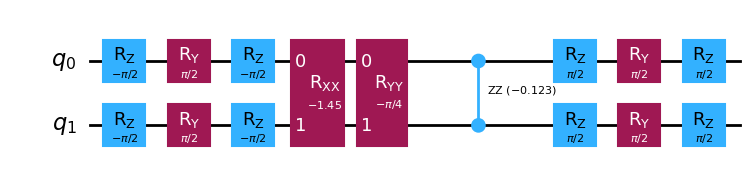

In [159]:
VCxGate.draw('mpl')

![Original matrix VCx and after Wesley aproximation](./wesleyMatrixFDecomposition.png)

In [160]:
cartanCirc = cartanCircuit(VCxGate)

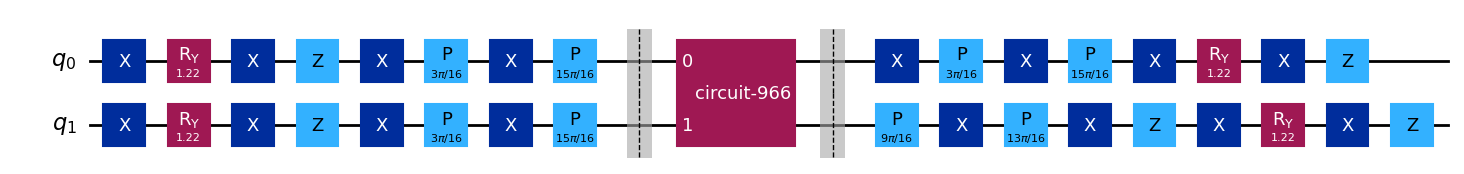

In [161]:
cartanCirc.draw('mpl')